## LSTM Example

We want to train an univariate, one feature LSTM

**0) Loading Libraries and Subroutines**

Standard libraries for plotting and numerical operations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/christianf/miniconda3/lib/python3.13/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [3]:
GRAPE_df = pd.read_pickle('pkl_data/GRAPE.pkl')
UW_df = pd.read_pickle('pkl_data/UW.pkl')

In [5]:
rows_not_nan = UW_df[UW_df.iloc[:,8].notna()]
print(rows_not_nan.shape)

(509, 19)


In [5]:
UW_df_usable = UW_df[~UW_df[9].isna()].copy()
dropped_cols = list(range(10,20))
UW_df_usable = UW_df_usable.drop(columns = dropped_cols)
UW_df_usable.tail()

Visit Number,1,2,3,4,5,6,7,8,9
ID,,,,,,,,,
983-OD,"[19, 15, 17, 9, 15, 26, 25, 24, 25, 25, 13, 26...","[22, 18, 18, 15, 21, 25, 23, 22, 25, 25, 15, 2...","[7, 8, 6, 12, 10, 24, 18, 16, 23, 20, 15, 26, ...","[20, 20, 24, 23, 22, 27, 28, 26, 27, 27, 24, 2...","[9, 15, 18, 13, 3, 25, 25, 23, 25, 23, 15, 25,...","[25, 23, 24, 25, 19, 28, 25, 27, 27, 29, 17, 2...","[21, 21, 17, 12, -1, 31, 28, 26, 28, 27, 8, 28...","[15, 5, 9, 17, 15, 28, 10, 12, 25, 19, 9, 20, ...","[21, 15, 21, 22, 12, 21, 23, 24, 24, 25, 11, 2..."
983-OS,"[20, 10, 7, 9, 23, 20, 22, 19, 21, 20, 16, 22,...","[16, 13, 18, 17, 17, 17, 21, 24, 25, 25, 19, 2...","[20, 16, 19, 18, 19, 25, 17, 22, 23, 19, 11, 2...","[14, 7, 10, 16, 11, 21, 13, 27, 24, 21, 4, 28,...","[13, -1, 6, 16, 17, 17, 20, 18, 20, 18, 12, 25...","[12, 13, 14, 20, 17, 21, 22, 22, 26, 22, 13, 2...","[19, 12, 15, 17, 15, 17, 17, 22, 25, 25, 13, 2...","[8, 14, 9, 12, 11, 18, 18, 16, 17, 10, 11, 21,...","[12, 7, 17, 16, 12, 18, 15, 19, 22, 18, -1, 15..."
986-OD,"[34, 35, 35, 29, 35, 33, 35, 34, 32, 29, 35, 3...","[27, 27, 22, 21, 28, 30, 29, 28, 30, 28, 30, 2...","[31, 27, 26, 29, 29, 32, 30, 33, 33, 33, 33, 3...","[31, 31, 27, 27, 28, 29, 31, 33, 31, 30, 30, 3...","[31, 31, 33, 29, 34, 32, 32, 28, 32, 29, 31, 3...","[28, 30, 27, 28, 30, 32, 30, 31, 31, 25, 30, 3...","[29, 29, 30, 27, 31, 32, 29, 29, 29, 30, 31, 3...","[28, 28, 29, 29, 29, 30, 31, 30, 31, 32, 30, 3...","[31, 30, 29, 24, 32, 32, 31, 29, 30, 29, 30, 3..."
986-OS,"[34, 29, 30, 35, 35, 33, 35, 35, 35, 35, 34, 3...","[25, 22, 21, 12, 30, 29, 26, 27, 25, 22, 26, 2...","[28, 30, 30, 27, 35, 31, 33, 29, 31, 35, 29, 3...","[26, 29, 27, 24, 25, 29, 28, 25, 23, 28, 32, 2...","[30, 26, 31, 27, 30, 31, 31, 31, 31, 28, 30, 3...","[28, 30, 27, 27, 30, 30, 30, 31, 30, 30, 31, 3...","[30, 30, 28, 29, 29, 32, 31, 31, 30, 35, 31, 3...","[30, 27, 28, 30, 28, 31, 30, 32, 31, 28, 29, 3...","[35, 33, 29, 30, 32, 31, 32, 31, 31, 30, 31, 3..."
991-OD,"[30, 29, 28, 29, 28, 31, 30, 32, 31, 28, 28, 3...","[28, 31, 28, 27, 31, 31, 31, 29, 31, 29, 29, 3...","[29, 32, 28, 30, 31, 31, 32, 32, 31, 31, 31, 3...","[31, 30, 30, 30, 33, 32, 33, 31, 33, 33, 33, 3...","[25, 29, 26, 26, 28, 29, 30, 28, 28, 28, 34, 2...","[29, 31, 32, 33, 29, 33, 32, 31, 30, 35, 31, 3...","[25, 26, 25, 28, 29, 32, 30, 30, 26, 29, 30, 3...","[32, 28, 26, 26, 34, 32, 33, 32, 31, 31, 31, 3...","[26, 26, 24, 22, 27, 29, 27, 27, 30, 26, 28, 3..."


Loading LSTM related keras libraries: -1 becomes 0 in UW

In [7]:
from keras import optimizers
from keras.layers import LSTM
from keras.layers import Dense, Masking, TimeDistributed, Reshape
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

2025-12-11 20:13:34.448396: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-11 20:13:40.536409: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-11 20:14:53.526845: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Calling a subroutine that puts data set in the correct shape for LSTM (see later)

In [8]:
from prepare_data import prepare_data

<br>

**1) Generating a Simple Dataset**

**2) Preprocessing the Data**

In [9]:
#need to convert to 3d array: patients x visits x features, where features is 54 sens vals

patients = UW_df_usable.shape[0]
visits = UW_df_usable.shape[1]
features = len(UW_df_usable.iloc[0, 0])
UW_3d = np.zeros((patients, visits, features), dtype= float)
for patient in range(patients):
    for visit in range(visits):
        feature_list = UW_df_usable.iloc[patient, visit]
        for feature in range(features):
            UW_3d[patient, visit, feature] = feature_list[feature]
print(UW_3d.shape)

(509, 9, 54)


2a) Scaling:

In [10]:
#flatten out to scale, replace -1 w/ NaN so its ignored in scaling
UW_flat = UW_3d.reshape(-1, features)
UW_flat_zero = np.where(UW_flat == -1, 0, UW_flat)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler  = MinMaxScaler(feature_range = (0, 1))
UW_scaled_flat = scaler.fit_transform(UW_flat_zero)
UW_scaled = UW_scaled_flat.reshape(patients, visits, features)
print(UW_scaled.shape)

(509, 9, 54)


2b) Reshaping the Data

The dataset has only one feature. We want to predict *dt_futu* data points into the future and train the LSTM with the previous *dt_past* time steps to predict the next. For that purpose, we need to reshape the data in such a way that *dt_futu* is interpreted as features. Therefore, we run the following subroutine:<br>
<br>

In [23]:
#create test/train splits for patient-level splitting
patient_indices = np.arange(patients)
np.random.seed(42)
np.random.shuffle(patient_indices)
train_split = int(np.round(0.7 * patients))

train_indices = patient_indices[:train_split]
test_indices = patient_indices[train_split:]

In [27]:
#past + fture <= 19
#patient - level splitting. indiv patient data not in both test / train
dt_past    = 7
dt_futu    = 2
n_features = 54
Xs_train, Xs_test = [], []
Ys_train, Ys_test = [], []

for p_idx in train_indices:
    [X, Y] = prepare_data(UW_scaled[p_idx], dt_past, dt_futu)
    Xs_train.append(X)
    Ys_train.append(Y)

for p_idx in test_indices:
    [X, Y] = prepare_data(UW_scaled[p_idx], dt_past, dt_futu)
    Xs_test.append(X)
    Ys_test.append(Y)


X_Train = np.vstack(Xs_train)
Y_Train = np.vstack(Ys_train)
X_Test = np.vstack(Xs_test)
Y_Test = np.vstack(Ys_test)

print(X_Train.shape, Y_Train.shape)
print(X_Test.shape, Y_Test.shape)

(356, 7, 54) (356, 2, 54)
(153, 7, 54) (153, 2, 54)


<br>

**3) Creating the Model**

Creating a LSTM in Python follows the same syntax as for CNNs. We want to predict data points in the future, based on previous data points. Therefore, we need to solve a **regression** problem:<br>

In [13]:
import tensorflow as tf

In [25]:
#LSTM model creation
n_neurons  = 128
batch_size = 32

model = Sequential()
model.add(LSTM(n_neurons, input_shape = (dt_past, n_features), activation = 'tanh', return_sequences = False))
model.add(Dense(dt_futu * n_features))
model.add(Reshape((dt_futu, n_features)))

opt = optimizers.Adam()
loss_fn = tf.keras.losses.Huber(delta=1.0)
model.compile(loss = loss_fn, optimizer = opt)

model.summary()

/home/christianf/miniconda3/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        93,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 108)            │        13,932 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 2, 54)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,628 (420.42 KB)

 Trainable params: 107,628 (420.42 KB)

 Non-trainable params: 0 (0.00 B)

<br>

**4) Running the Fit**

In [26]:
n_epochs = 50
out = model.fit(X_Train, Y_Train, epochs = n_epochs, batch_size = batch_size, validation_data= (X_Test, Y_Test), verbose = 2, shuffle = True)

Epoch 1/50
12/12 - 2s - 144ms/step - loss: 0.3454 - val_loss: 0.2704
Epoch 2/50
12/12 - 0s - 13ms/step - loss: 0.2639 - val_loss: 0.2172
Epoch 3/50
12/12 - 0s - 13ms/step - loss: 0.2170 - val_loss: 0.1932
Epoch 4/50
12/12 - 0s - 13ms/step - loss: 0.1971 - val_loss: 0.1839
Epoch 5/50
12/12 - 0s - 14ms/step - loss: 0.1838 - val_loss: 0.1739
Epoch 6/50
12/12 - 0s - 13ms/step - loss: 0.1736 - val_loss: 0.1683
Epoch 7/50
12/12 - 0s - 13ms/step - loss: 0.1672 - val_loss: 0.1651
Epoch 8/50
12/12 - 0s - 13ms/step - loss: 0.1611 - val_loss: 0.1630
Epoch 9/50
12/12 - 0s - 14ms/step - loss: 0.1548 - val_loss: 0.1595
Epoch 10/50
12/12 - 0s - 13ms/step - loss: 0.1494 - val_loss: 0.1566
Epoch 11/50
12/12 - 0s - 13ms/step - loss: 0.1452 - val_loss: 0.1563
Epoch 12/50
12/12 - 0s - 14ms/step - loss: 0.1409 - val_loss: 0.1538
Epoch 13/50
12/12 - 0s - 22ms/step - loss: 0.1367 - val_loss: 0.1534
Epoch 14/50
12/12 - 0s - 13ms/step - loss: 0.1335 - val_loss: 0.1524
Epoch 15/50
12/12 - 0s - 13ms/step - loss:

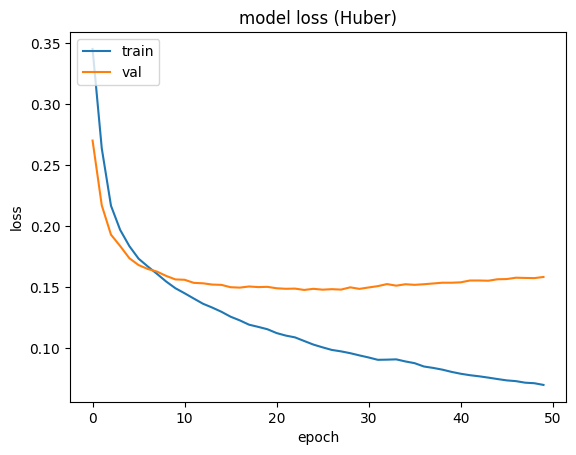

In [28]:
#plotting #############################################################
plt.plot(out.history['loss'])
plt.plot(out.history['val_loss'])
plt.title('model loss (Huber)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.savefig('training loss.pdf')
plt.show()
#######################################################################

<br>

**5) Evaluating the Fit**

In [57]:
#choose indiv patient from validation split to analyze results:
test_pat = test_indices[0]

X_pat, Y_pat = prepare_data(UW_scaled[test_pat], dt_past, dt_futu)
pred = model.predict(X_pat)
actual = Y_pat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [71]:
#inverse transform from scaled data --> actual data
pred = np.array(pred)
actual = np.array(actual)
flat_pred = pred.reshape(-1, 54)
flat_actual = actual.reshape(-1, 54)
pred_unscaled = scaler.inverse_transform(flat_pred)
pred_unscaled = np.clip(pred_unscaled, 0, None)
actual_unscaled = scaler.inverse_transform(flat_actual)
print(flat_pred.shape)
print(flat_actual.shape)

(2, 54)
(2, 54)


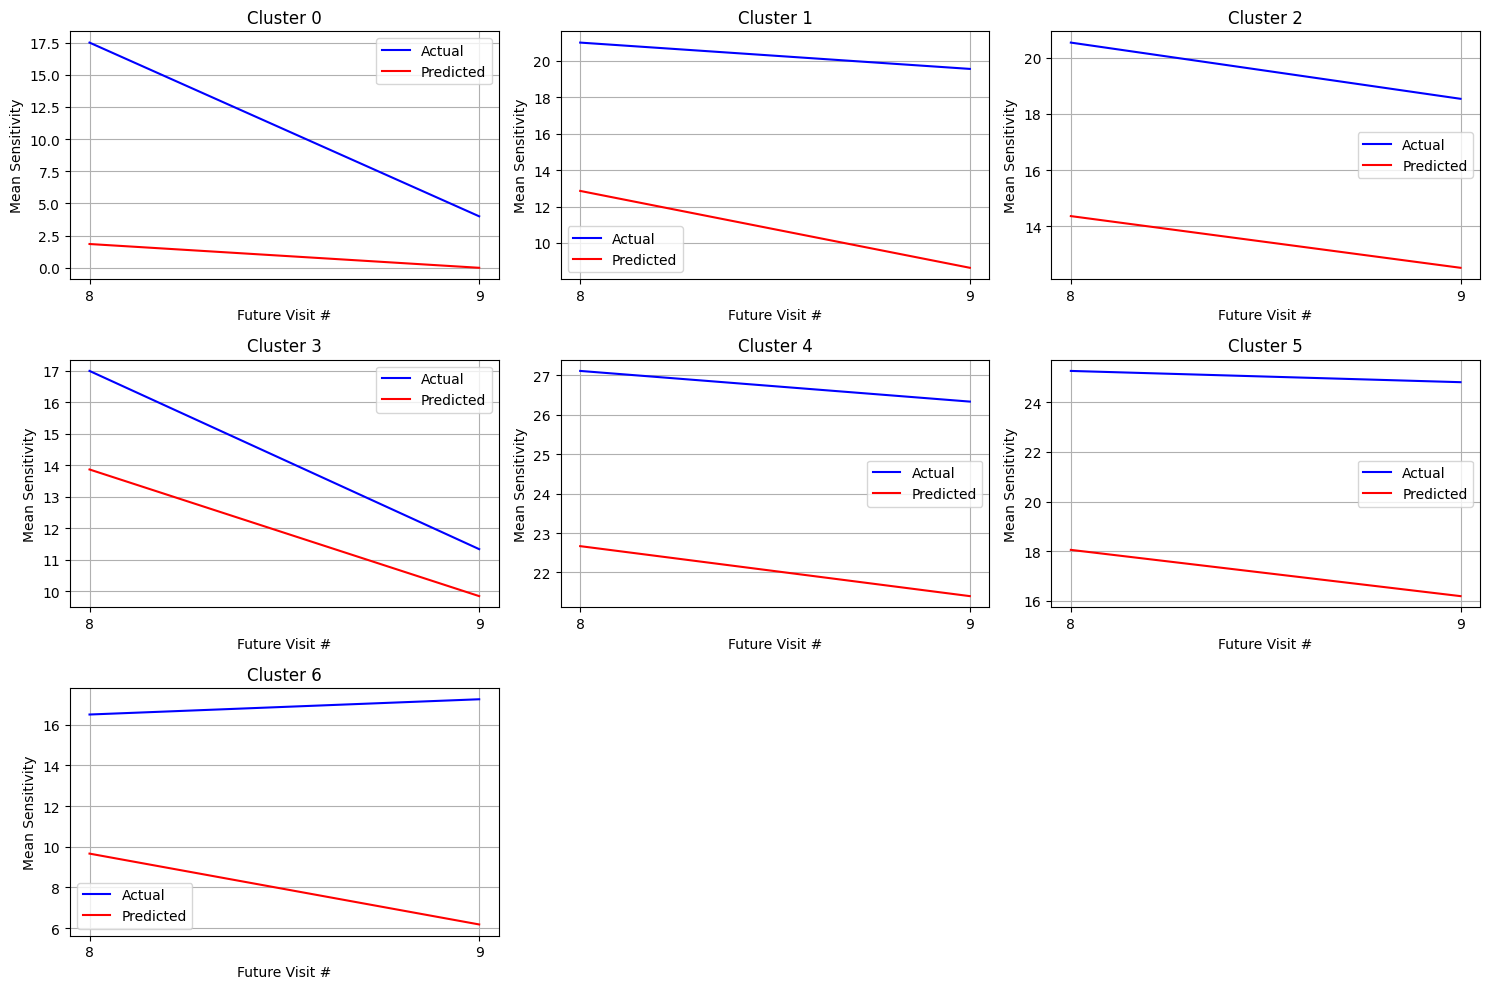

In [70]:
#plot mean sensitivty for each cluster
cluster_indices = {
    0: [25, 34],
    1: [0,1,2,3,4,8,9,16,17],
    2: [5,6,7,10,11,12,13,14,15,18,19,20,21],
    3: [22,23,24,31,32,33],
    4: [28,29,30,37,38,39,40,46,47],
    5: [27,36,42,44,45,48,49,50,51,52,53],
    6: [17,26,35,43]
}
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, features in enumerate(cluster_indices.values()):
    ax = axes[i]
    
    # average for each cluster
    actual_cluster = actual_unscaled[:, features].mean(axis=1) 
    pred_cluster = pred_unscaled[:, features].mean(axis=1)
    
    visits = np.arange(actual_unscaled.shape[0]) + 8  # shift x-axis
    
    # plot averaged values
    ax.plot(visits, actual_cluster, '-', label='Actual', color='blue')
    ax.plot(visits, pred_cluster, '-', label='Predicted', color='red')
    
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Future Visit #')
    ax.set_ylabel('Mean Sensitivity')
    ax.set_xticks(np.arange(8, 8 + actual_unscaled.shape[0], 1))
    ax.grid(True)
    ax.legend()
for j in range(len(cluster_indices), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

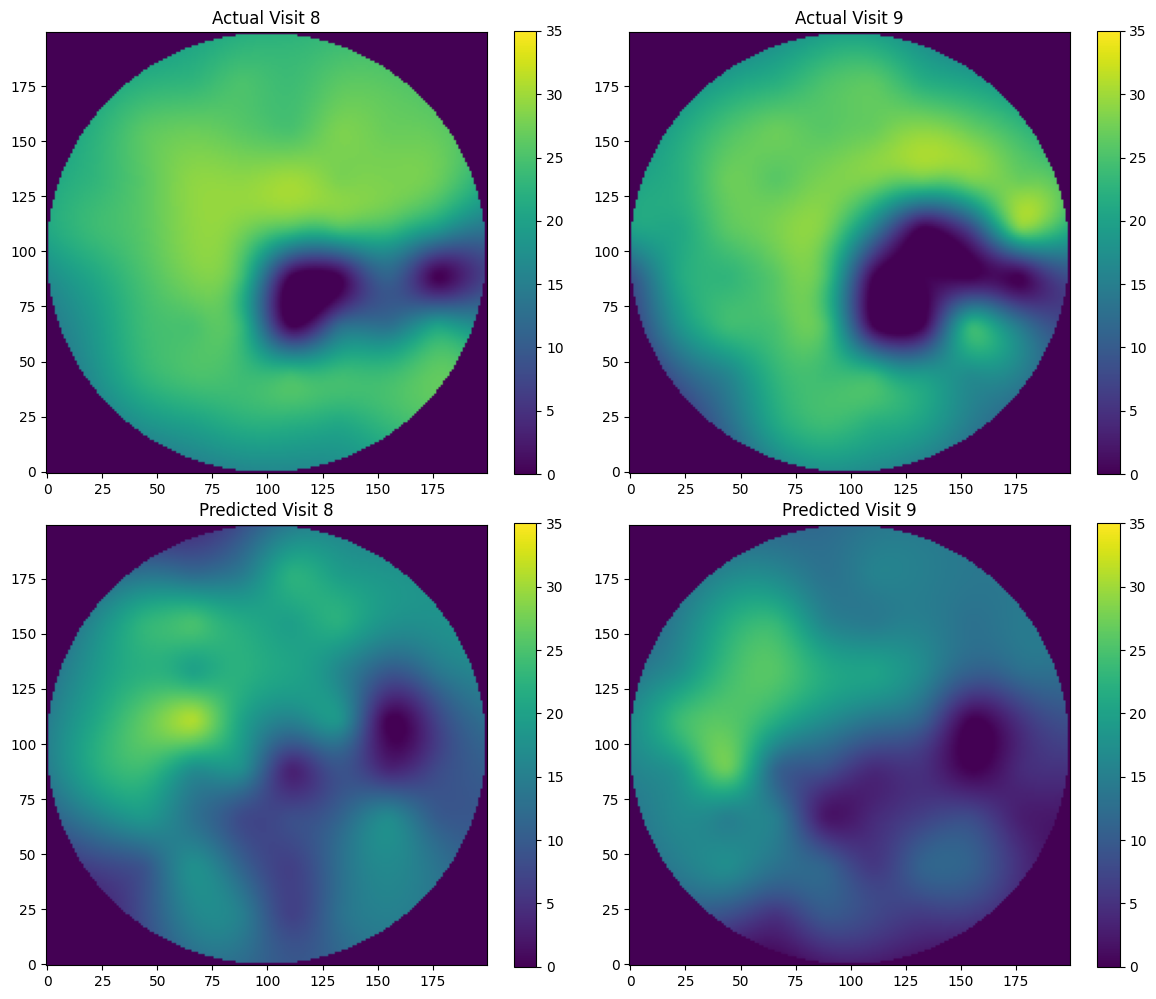

In [63]:
#plot interpolated VF's: actual vs predicted
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import pandas as pd

# Coordinates
coordinates_df = pd.read_csv("data/UW_coords.csv")
all_coords = np.array([(coordinates_df["X"][i], -coordinates_df["Y"][i]) 
                       for i in range(len(coordinates_df))])

# Grid for interpolation
radius = 27
grid_x, grid_y = np.mgrid[-27:27:200j, -27:27:200j]
mask = (np.sqrt(grid_x**2 + grid_y**2) <= radius)
mask_float = mask.astype(np.float32)

# Interpolation function
def vf_to_image(vf_values, coords, grid_x, grid_y, mask):
    rbf = Rbf(coords[:,0], coords[:,1], vf_values, function='thin_plate')
    grid_z = rbf(grid_x, grid_y)
    masked_grid = np.where(mask, grid_z, np.nan)
    values = np.nan_to_num(masked_grid, nan=0.0)
    values = np.maximum(values, 0)
    img = np.stack([values.T, mask_float], axis=-1)  
    return img, values.T

# Prepare the four sets of data
vf_list = [actual_unscaled[0], actual_unscaled[1],
           pred_unscaled[0], pred_unscaled[1]]
titles = ['Actual Visit 8', 'Actual Visit 9', 'Predicted Visit 8', 'Predicted Visit 9']

# Plot 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, vf in enumerate(vf_list):
    img, values = vf_to_image(vf, all_coords, grid_x, grid_y, mask)
    im = axes[i].imshow(values, origin='lower', cmap='viridis', vmin=0, vmax=35)
    axes[i].set_title(titles[i])
    fig.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

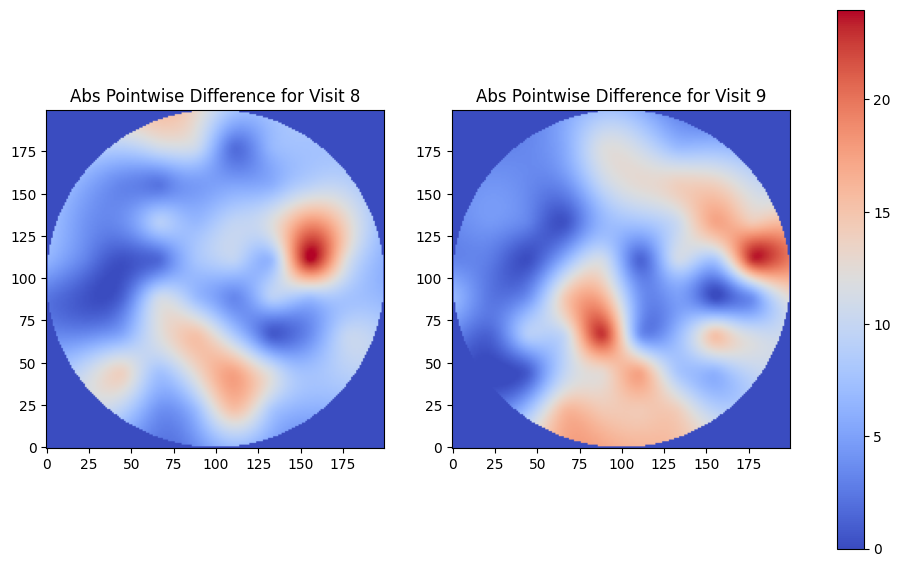

In [64]:
#plot differences in VF actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
axes = axes.flatten()

all_values = np.concatenate([vf.flatten() for vf in pt_dif])
vmin, vmax = np.min(all_values), np.max(all_values)

for i, vf in enumerate(pt_dif):
    img, values = vf_to_image(vf, all_coords, grid_x, grid_y, mask)
    im = axes[i].imshow(values, origin='lower', cmap='coolwarm', vmin=vmin, vmax=vmax)
    axes[i].set_title(f"Abs Pointwise Difference for Visit {i + 8}")

cbar = fig.colorbar(im, ax=axes.ravel(), shrink=0.7)
plt.show()